In [1]:
import pandas as pd
substance = 'archive/SubstanceHarmsData.csv'
substance_data = pd.read_csv(substance)
substance_data.head()

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
0,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Crude rate,7.8
1,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Crude rate,10.7
2,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2018,NaN,NaN,Crude rate,11.4
3,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2019,NaN,NaN,Crude rate,9.9
4,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2020,NaN,NaN,Crude rate,16.8


check data type

In [2]:
print(substance_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27909 entries, 0 to 27908
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Substance         27909 non-null  object
 1   Source            27909 non-null  object
 2   Specific_Measure  27909 non-null  object
 3   Type_Event        27909 non-null  object
 4   Region            27909 non-null  object
 5   PRUID             27909 non-null  int64 
 6   Time_Period       27909 non-null  object
 7   Year_Quarter      27909 non-null  object
 8   Aggregator        20284 non-null  object
 9   Disaggregator     20284 non-null  object
 10  Unit              27909 non-null  object
 11  Value             23910 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.6+ MB
None


check total records, find out how many records its has and how many records can be used to analyze.

In [ ]:
# get the row of data
num_row = len(substance_data)
print(num_row)

Check total records contains invalid data.

In [ ]:
#get the row that value contain text and value can not be used.
#try to convert data in column name Value to number
substance_data['Value_numeric'] = pd.to_numeric(substance_data['Value'], errors='coerce')

#indentify row with invalid data
inval_rows = substance_data[substance_data['Value_numeric'].isna()]
num_inval_rows = len(inval_rows)
print("Row with improper data:")
print(inval_rows)
print(f'This file has {num_inval_rows} rows invalid.')

Check if data contains null value

In [16]:
# check null data in every column
data_null = substance_data.isnull().sum()
print(f'This file has {data_null} rows contain NULL data.')

This file has Substance              0
Source                 0
Specific_Measure       0
Type_Event             0
Region                 0
PRUID                  0
Time_Period            0
Year_Quarter           0
Aggregator          7625
Disaggregator       7625
Unit                   0
Value               3999
Value_numeric       6838
dtype: int64 rows contain NULL data.


In [ ]:
grouped = substance_data.groupby('Year_Quarter')['Value'].sum()
print(grouped)

In [4]:
substance_data.describe()

,PRUID
count,27909.000000
mean,30.964026
std,22.534189
min,1.000000
25%,11.000000
50%,35.000000
75%,48.000000
max,63.000000


In [21]:
substance_data['Value_numeric'] = pd.to_numeric(substance_data['Value'], errors='coerce')
print(substance_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27909 entries, 0 to 27908
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Substance         27909 non-null  object 
 1   Source            27909 non-null  object 
 2   Specific_Measure  27909 non-null  object 
 3   Type_Event        27909 non-null  object 
 4   Region            27909 non-null  object 
 5   PRUID             27909 non-null  int64  
 6   Time_Period       27909 non-null  object 
 7   Year_Quarter      27909 non-null  object 
 8   Aggregator        20284 non-null  object 
 9   Disaggregator     20284 non-null  object 
 10  Unit              27909 non-null  object 
 11  Value             23910 non-null  object 
 12  Value_numeric     21071 non-null  float64
dtypes: float64(1), int64(1), object(11)
memory usage: 2.8+ MB
None


Filter the data set

In [22]:
total_opioid_toxicity_deaths_data = substance_data[
    (substance_data['Substance']== 'Opioids') &
    (substance_data['Region'] == 'Canada') &
    (substance_data['Specific_Measure'] == 'Overall numbers') &
    (substance_data['Unit'] == 'Crude rate')&
    (substance_data['Type_Event'] == 'Total apparent opioid toxicity deaths')
]

print(total_opioid_toxicity_deaths_data)

  Substance  Source Specific_Measure                             Type_Event  \
0   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
1   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
2   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
3   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
4   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
5   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
6   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
7   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
8   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   

   Region  PRUID Time_Period       Year_Quarter Aggregator Disaggregator  \
0  Canada      1     By year               2016        NaN           NaN   
1  Canada      1     By year               2017        Na

In [23]:
total_opioid_toxicity_deaths_data['Year'] = total_opioid_toxicity_deaths_data['Year_Quarter'].str.extract(r'(\d{4})')

print(total_opioid_toxicity_deaths_data[['Year_Quarter', 'Year']])
print(total_opioid_toxicity_deaths_data.info())

        Year_Quarter  Year
0               2016  2016
1               2017  2017
2               2018  2018
3               2019  2019
4               2020  2020
5               2021  2021
6               2022  2022
7               2023  2023
8  2024 (Jan to Jun)  2024
<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Substance         9 non-null      object 
 1   Source            9 non-null      object 
 2   Specific_Measure  9 non-null      object 
 3   Type_Event        9 non-null      object 
 4   Region            9 non-null      object 
 5   PRUID             9 non-null      int64  
 6   Time_Period       9 non-null      object 
 7   Year_Quarter      9 non-null      object 
 8   Aggregator        0 non-null      object 
 9   Disaggregator     0 non-null      object 
 10  Unit              9 non-null      object 
 11  Value             

/var/folders/17/njh92ccn75l5xb8knljb82tc0000gn/T/ipykernel_1372/118972611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_opioid_toxicity_deaths_data['Year'] = total_opioid_toxicity_deaths_data['Year_Quarter'].str.extract(r'(\d{4})')


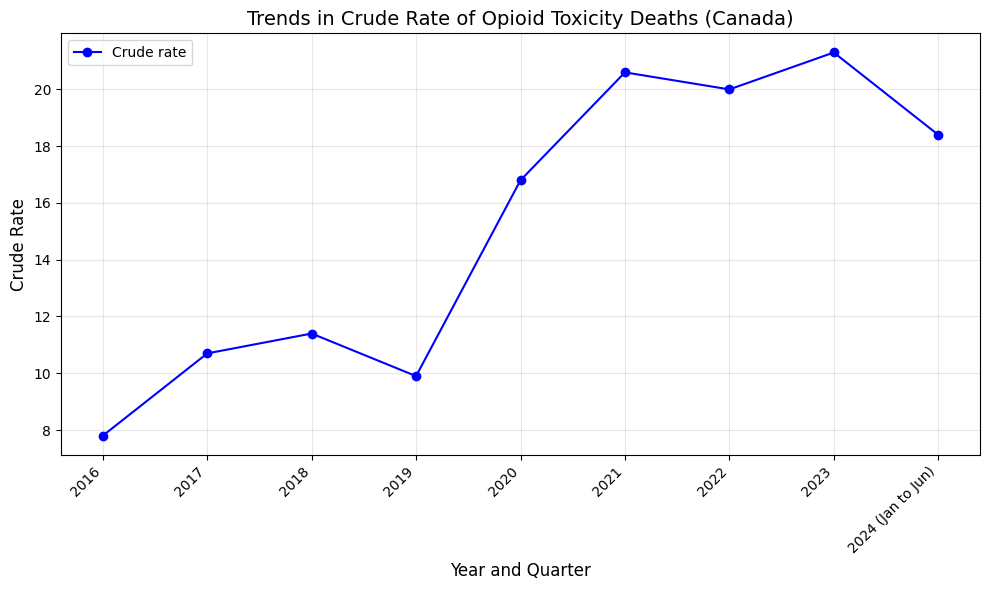

In [26]:
import matplotlib.pyplot as plt
# Sort the data by time for accurate visualization
total_opioid_toxicity_deaths_data = total_opioid_toxicity_deaths_data.sort_values(by=['Year_Quarter','Value_numeric'])

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(total_opioid_toxicity_deaths_data['Year_Quarter'], total_opioid_toxicity_deaths_data['Value_numeric'], marker='o', color= 'b', label='Crude rate')

# Add label and title
plt.title('Trends in Crude Rate of Opioid Toxicity Deaths (Canada)', fontsize=14)
plt.xlabel('Year and Quarter', fontsize=12)
plt.ylabel('Crude Rate',fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# show the plot
plt.show()